In [3]:
import torch
import pandas as pd
import torchvision
from torchvision import transforms, datasets

In [4]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = rain = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

torch.nn for OOPs,   
torch.nn.functional for functions

In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return F.log_softmax(x, dim=1, )
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
X = torch.randn((28,28))
X = X.view(-1,28*28)
output = net(X)

In [9]:
output

tensor([[-2.2382, -2.4629, -2.1543, -2.3531, -2.2580, -2.3222, -2.3105, -2.4178,
         -2.3533, -2.1974]], grad_fn=<LogSoftmaxBackward0>)

In [10]:
import torch.optim as optim

# net.parameters() -> adjustable parameters, lr = learning rate -> size of the step   
optimizer = optim.Adam(net.parameters(), lr=0.001)
# epochs = whole passes through the data
EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is branch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0904, grad_fn=<NllLossBackward0>)
tensor(0.3424, grad_fn=<NllLossBackward0>)
tensor(0.0407, grad_fn=<NllLossBackward0>)


In [13]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1

print("Accuracy : ", round(correct/total*100, 3))

Accuracy :  97.935


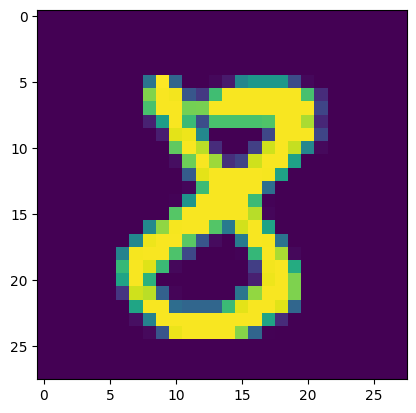

In [24]:
import matplotlib.pyplot as plt
plt.imshow(X[3].view(28,28))
plt.show()

In [25]:
print(torch.argmax(net(X[3].view(-1, 784))[0]))

tensor(8)
